### SQL Magic

In [3]:
%pip install ipython-sql

In [4]:
%load_ext sql

In [10]:
import sqlite3
import csv

conn = sqlite3.connect(':memory:')
cur = conn.cursor()

In [11]:
%%sql
create table students (
    ID int,
    Name varchar(255),
    Age int,
    Grade char(1),
    Email varchar(255)
);

insert into students values (1, 'Alice', 20, 'A', ' [email protected]'); 
insert into students values (2, 'Bob', 21, 'B', ' [email protected]');
insert into students values (3, 'Charlie', 22, 'A', ' [email protected]');
insert into students values (4, 'David', 23, 'B', ' [email protected]');
insert into students values (5, 'Eve', 24, 'B', ' [email protected]');
insert into students values (6, 'Frank', 25, 'B', ' [email protected]');
insert into students values (7, 'Grace', 26, 'F', ' [email protected]');
insert into students values (8, 'Helen', 27, 'F', ' [email protected]');
insert into students values (9, 'Ivy', 28, 'A', ' [email protected]');
insert into students values (10, 'Jack', 29, 'B', ' [email protected]');
insert into students values (11, 'Kate', 30, 'B', ' [email protected]');
insert into students values (12, 'Leo', 31, 'F', ' [email protected]');
insert into students values (13, 'Mia', 32, 'F', ' [email protected]');
insert into students values (14, 'Nina', 33, 'A', ' [email protected]');
insert into students values (15, 'Oscar', 34, 'B', ' [email protected]');
insert into students values (16, 'Peter', 35, 'B', ' [email protected]');
insert into students values (17, 'Queen', 36, 'F', ' [email protected]');
insert into students values (18, 'Rose', 37, 'F', ' [email protected]');
insert into students values (19, 'Sam', 38, 'A', ' [email protected]');
insert into students values (20, 'Tom', 39, 'B', ' [email protected]');

 * sqlite:///students.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [6]:
%sql sqlite:///students.db

In [12]:
import prettytable

prettytable.DEFAULT = 'DEFAULT'

In [13]:
grade = 'A'
%sql select * from students where Grade = :grade

 * sqlite:///students.db
Done.


ID,Name,Age,Grade,Email
1,Alice,20,A,[email protected]
3,Charlie,22,A,[email protected]
9,Ivy,28,A,[email protected]
14,Nina,33,A,[email protected]
19,Sam,38,A,[email protected]


In [16]:
grade_distribution = %sql select Grade, count(*) as Count from students group by Grade;
grade_distribution_df = grade_distribution.DataFrame()
grade_distribution_df

 * sqlite:///students.db
Done.


,Grade,Count
0,A,5
1,B,9
2,F,6


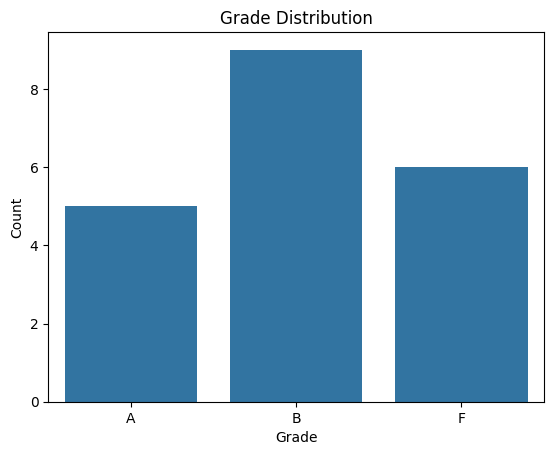

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Grade', y='Count', data=grade_distribution_df)
plt.title('Grade Distribution')
plt.show()

In [20]:
conn.close()